In [2]:
!pip install -U imbalanced-learn
!pip install -U seaborn
!pip install -U plotly

In [3]:
#Code snippet 1
# Importing various Python libraries and modules for data processing, visualization, and machine learning.
import os  # provides functions for interacting with the operating system.
import sys  # provides access to various system-specific parameters and functions
import numpy as np  # for numerical operations and creating arrays in Python
import pandas as pd  # for data manipulation and analysis
from pandas import set_option  # for setting various options on how data is displayed and processed
import matplotlib  # for creating data visualizations in Python
import matplotlib.pyplot as plt  # for creating plots and charts
from matplotlib.font_manager import FontProperties  # for customizing font properties in plots
import seaborn as sns  # for creating statistical graphics
import plotly.express as px  # for interactive visualizations

# for scaling numerical data to a specific range, typically between 0 and 1
from sklearn.preprocessing import MinMaxScaler

# These metrics include accuracy, precision, recall, F1-score, and a classification report,
# which provides a summary of various classification metrics.
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)

# Oversampling techniques
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SMOTE

# for creating pipelines in imbalanced-learn
from imblearn.pipeline import make_pipeline

# for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Ensemble learning algorithm - Random Forest
from sklearn.ensemble import RandomForestClassifier

# for confusion matrix
from sklearn.metrics import confusion_matrix

# for statistical analysis
import scipy.stats
import statsmodels.api as sm
import statsmodels.api as sm
import statsmodels.tsa as tsa

# Undersampling technique
from imblearn.under_sampling import ClusterCentroids

# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Model evaluation using cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Support Vector Machine classifiers
from sklearn.svm import SVC, LinearSVC

# Scoring metrics for classification
from sklearn.metrics import (
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    accuracy_score,
)

# k-Nearest Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression classifier
from sklearn.linear_model import LogisticRegression


In [4]:
#Code snippet 2
# Create a .csv version of the original dataset (.xls)
INPUT_PATH = "https://raw.githubusercontent.com/starfieldhub/Data-Analytics-Project/master/default%20of%20credit%20card%20clients.csv"

# Specify the scaler type: 'std' for StandardScaler, 'minmax' for MinMaxScaler
SCALER = 'std'  # else 'minmax'

# Show figures during execution
SHOW_FIGURE = True

# Preprocessing options
FEATURE_SELECTION = True  # if 'True', Feature Selection will be applied
APPLY_PCA = True  # if 'True', Principal Component Analysis will be applied
APPLY_OVERSAMPLING = True  # if 'True', SMOTE Oversampling will be applied

# Fixed random state for reproducibility
RANDOM_STATE = 42

# Pandas display options
pd.set_option('display.max_colwidth', None)  # Display full content of DataFrame columns
pd.set_option('display.precision', 2)  # Display two decimal places for floating-point numbers


In [5]:
#Code Snippet 3

# Read input data from the specified CSV file
data = pd.read_csv(INPUT_PATH)

# Print the first few rows of the dataset
print(data.head())

# Print the column names of the dataset
print(data.columns)

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [6]:
# Code Snippet 4

# Count the rows without the header
total_observations_without_header = len(data)
print("Total number of observations without the header:", total_observations_without_header)

# Assuming the column name for default is "default payment next month"
total_defaulters = len(data[data["default.payment.next.month"] == 1])
total_non_defaulters = len(data[data["default.payment.next.month"] == 0])

# Print the counts of defaulters and non-defaulters
print("Total Defaulters:", total_defaulters)
print("Total Non-Defaulters:", total_non_defaulters)

Total number of observations without the header: 30000
Total Defaulters: 6636
Total Non-Defaulters: 23364


<ipython-input-7-bfa53572396d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default.payment.next.month', data=data, palette=['purple', 'red'])


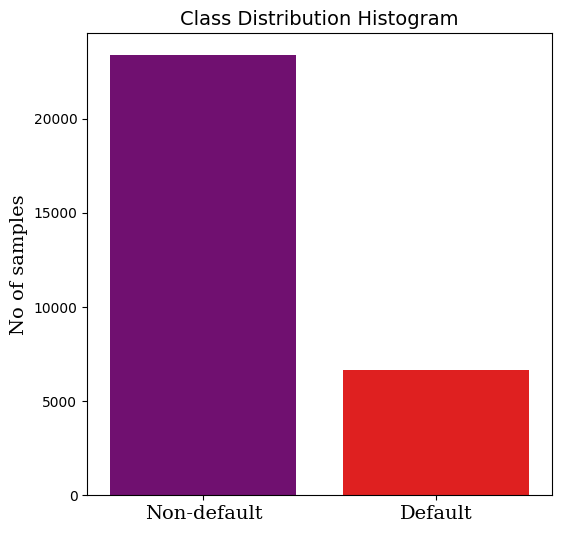

In [7]:
# Code Snippet 5

font = FontProperties()
font.set_family(['serif'])
font.set_size(14)

# Create a figure with a specific size
plt.figure(figsize=(6, 6))

# Use Seaborn's countplot to visualize the class distribution
sns.countplot(x='default.payment.next.month', data=data, palette=['purple', 'red'])

# Set title and axis labels
plt.title('Class Distribution Histogram', fontsize=14)
plt.xticks([0, 1], ['Non-default', 'Default'], fontproperties=font)
plt.ylabel('No of samples', fontproperties=font)
plt.xlabel('')

# Save the figure to a file
plt.savefig('Distribution_of_Default_and_Non-default')

# Display the plot on the screen
plt.show()

In [9]:
# Code Snippet 6

# Check the data types of columns in the DataFrame
data_types = data.dtypes

# Print the data types of each column
print(data_types)

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object


In [10]:
# Code snippet 7

# Check for missing values
missing_values = data.isnull().sum()

# Calculate the total count of missing values
total_missing_values = missing_values.sum()

print("Total missing values:", total_missing_values)

Total missing values: 0


In [11]:
#Code snippet 8

# Summary Statistics
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,...,30000.00,30000.00,30000.00,30000.00,3.00e+04,30000.00,30000.00,30000.00,30000.00,30000.00
mean,15000.50,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,...,43262.95,40311.40,38871.76,5663.58,5.92e+03,5225.68,4826.08,4799.39,5215.50,0.22
std,8660.40,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,...,64332.86,60797.16,59554.11,16563.28,2.30e+04,17606.96,15666.16,15278.31,17777.47,0.42
min,1.00,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,...,-170000.00,-81334.00,-339603.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00
25%,7500.75,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,...,2326.75,1763.00,1256.00,1000.00,8.33e+02,390.00,296.00,252.50,117.75,0.00
50%,15000.50,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,...,19052.00,18104.50,17071.00,2100.00,2.01e+03,1800.00,1500.00,1500.00,1500.00,0.00
75%,22500.25,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,...,54506.00,50190.50,49198.25,5006.00,5.00e+03,4505.00,4013.25,4031.50,4000.00,0.00
max,30000.00,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,...,891586.00,927171.00,961664.00,873552.00,1.68e+06,896040.00,621000.00,426529.00,528666.00,1.00


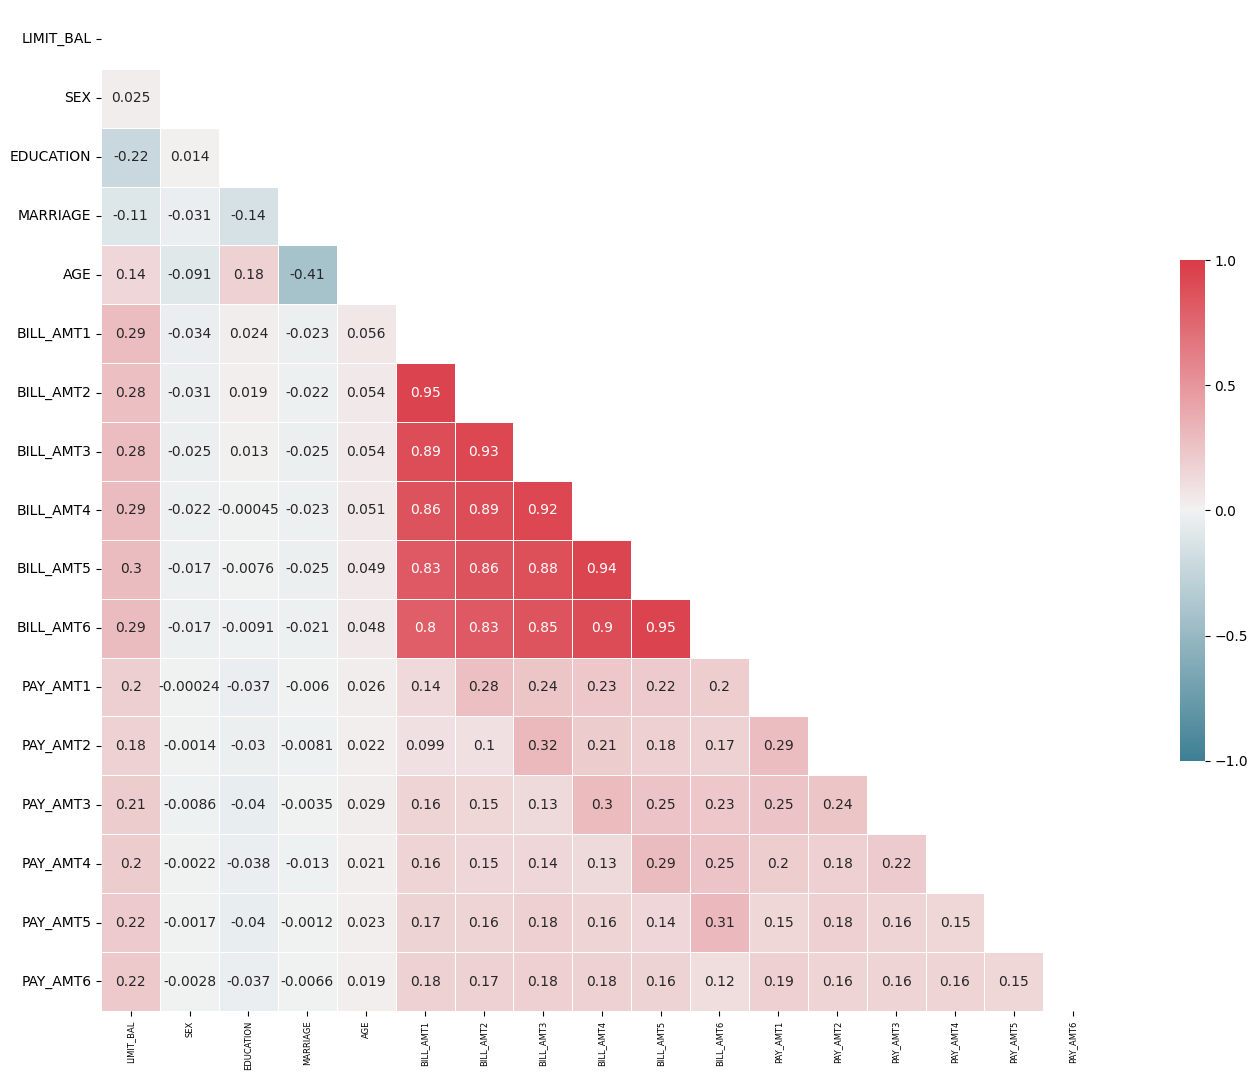

<Figure size 640x480 with 0 Axes>

In [12]:
#Code Snippet 9

# Specify the numeric columns for correlation analysis
numeric = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Calculate the correlation matrix
corr = data[numeric].corr()

# Create a mask to hide the upper triangle of the matrix (redundant information)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure and axis
f, ax = plt.subplots(figsize=(20, 13))

# Create a diverging color palette
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot the heatmap
ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
                 square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10})

# Customize the colorbar ticks
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])

# Customize the font size of ticks
plt.xticks(fontsize=6)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

# Save the plot as an image file
plt.savefig('Fig - Correlation matrix by means of the Pearson’s coefficient for all feature pairs.png')

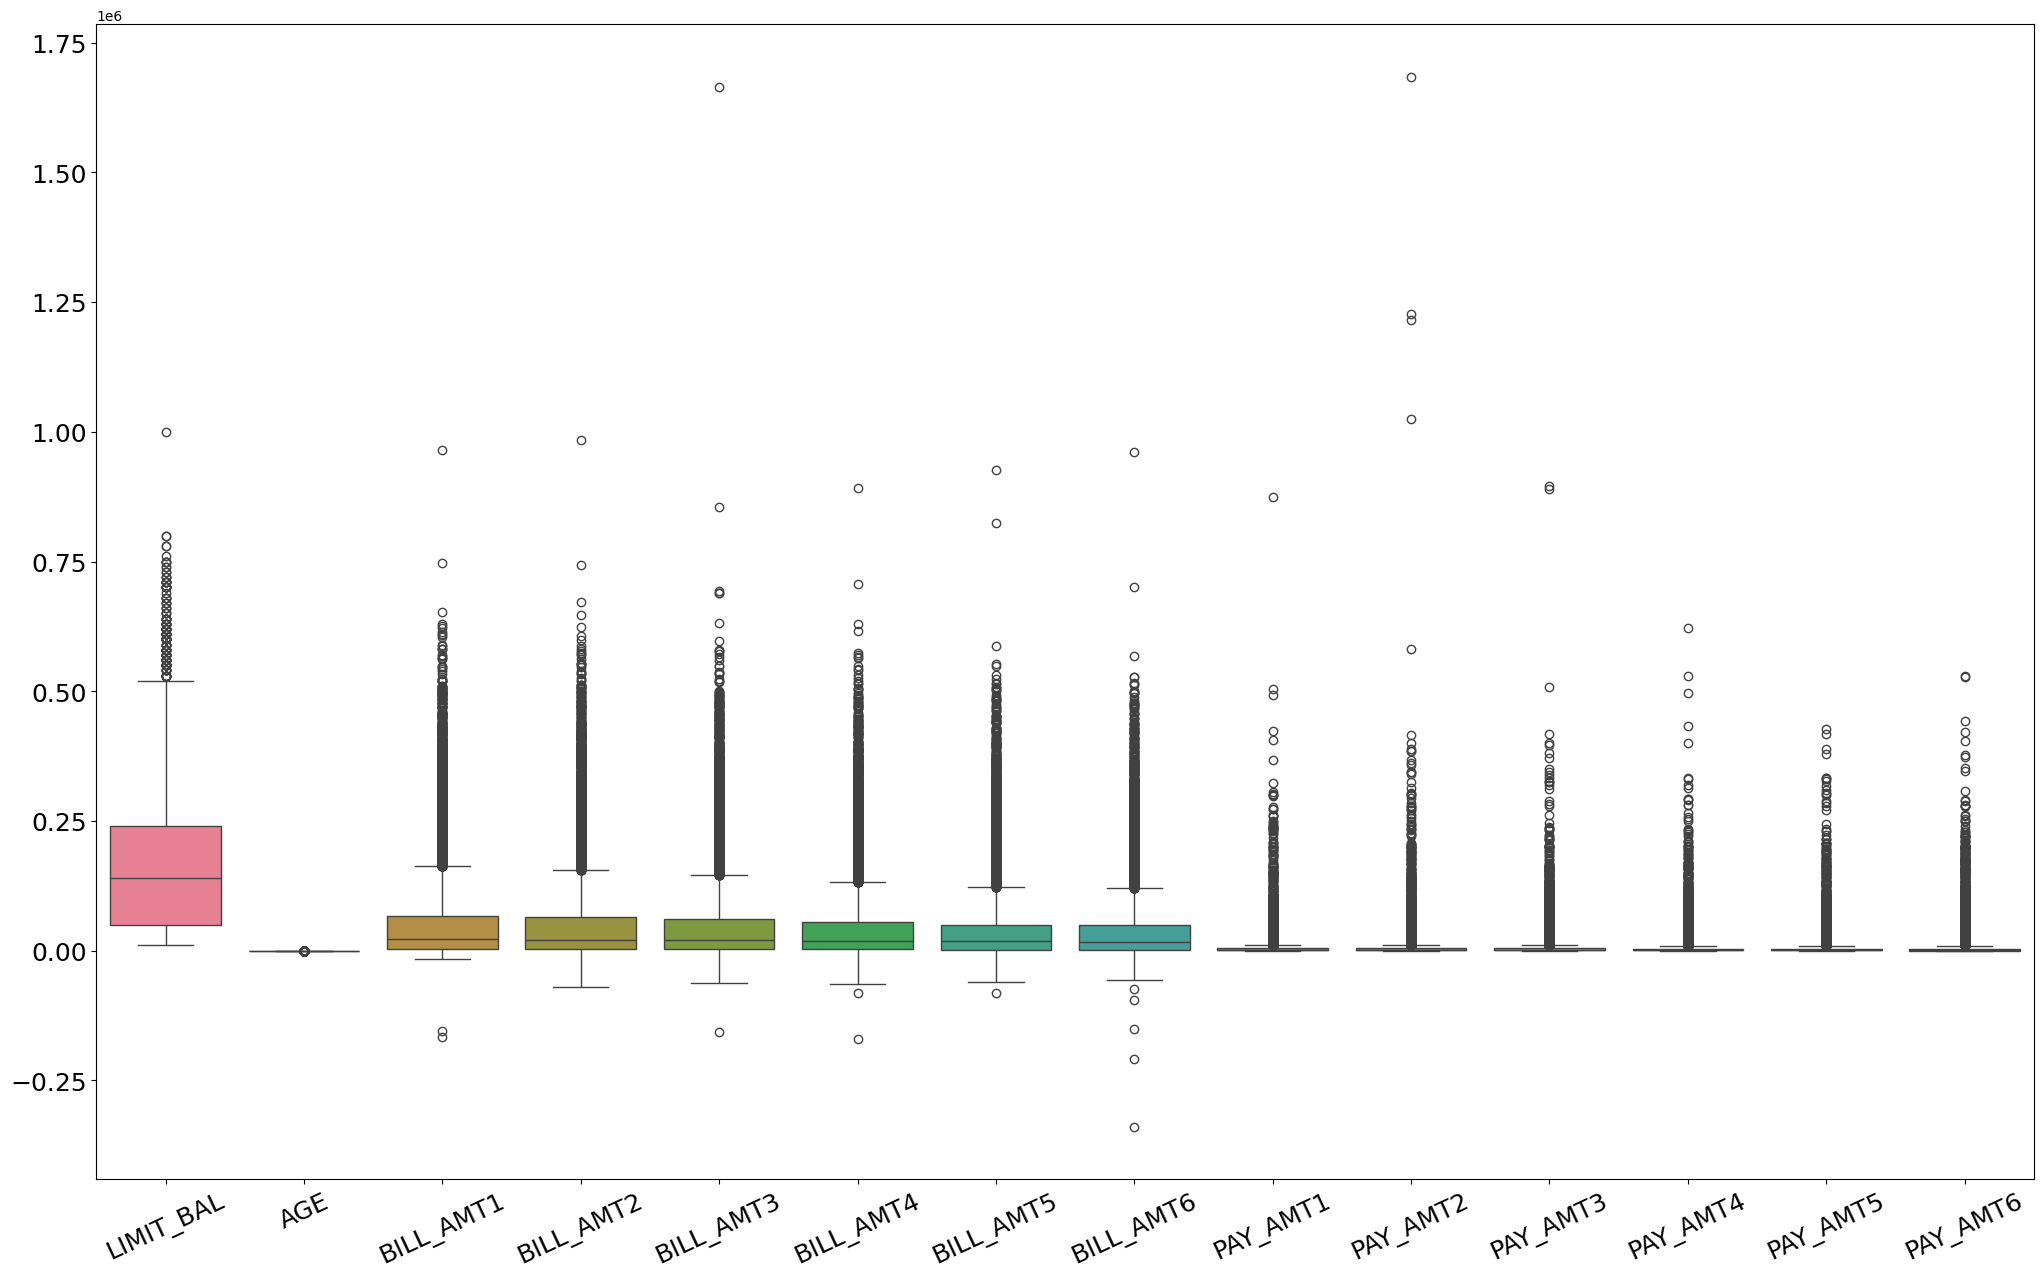

In [13]:
#Code Snippet 10

# Specify the numeric columns for the boxplot
cols = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Create a figure with a specified size
fig = plt.figure(1, figsize=(25, 15))

# Add a subplot to the figure
ax = fig.add_subplot(111)

# Create a boxplot for the selected columns
sns.boxplot(data=data[cols])

# Customize x-axis ticks and labels
plt.xticks(np.arange(0, 14), labels=cols, rotation=25, fontsize=18)

# Customize y-axis ticks
plt.yticks(fontsize=18)

# Save the figure
plt.savefig('Fig - Boxplot')

# Show the plot
plt.show()


In [14]:
# Code Snippet 11:

# Rename variable 'PAY_0' to 'PAY_1'
data.rename(columns={"PAY_0": "PAY_1"}, inplace=True)

# Rename target variable: 'default.payment.next.month' to 'Default'
data.rename(columns={"default.payment.next.month": "Default"}, inplace=True)

# Convert the class label to a category
data["Default"] = data["Default"].astype('category')

In [15]:
#Code Snippet 12:

# Separating features and target
y = data.Default     # Target: default=1 or non-default=0
X = data.drop('Default', axis=1, inplace=False)  # Features

In [16]:
#Code Snippet 13:
from sklearn.model_selection import train_test_split

# Split the dataset into training/validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)


In [17]:
# Code snippet 14:

# Check dimensions of training/validation and test sets
print("Training/Validation set:")

# Print the shape of the feature matrix for training/validation set
print(f" - X_train_val shape: {X_train_val.shape}")

# Print the shape of the target vector for training/validation set
print(f" - y_train_val shape: {y_train_val.shape}")

print("\nTest set:")

# Print the shape of the feature matrix for the test set
print(f" - X_test shape: {X_test.shape}")

# Print the shape of the target vector for the test set
print(f" - y_test shape: {y_test.shape}")

print("\nClass distribution:")

print("Training/Validation set:")

# Print the number of non-defaulters (class 0) in the training/validation set
print(f" + Non-defaulters (y=0): {sum(y_train_val==0)}")

# Print the number of defaulters (class 1) in the training/validation set
print(f" + Defaulters (y=1):      {sum(y_train_val==1)}")

print("\nTest set:")

# Print the number of non-defaulters (class 0) in the test set
print(f" + Non-defaulters (y=0): {sum(y_test==0)}")

# Print the number of defaulters (class 1) in the test set
print(f" + Defaulters (y=1):      {sum(y_test==1)}")

Training/Validation set:
 - X_train_val shape: (24000, 24)
 - y_train_val shape: (24000,)

Test set:
 - X_test shape: (6000, 24)
 - y_test shape: (6000,)

Class distribution:
Training/Validation set:
 + Non-defaulters (y=0): 18691
 + Defaulters (y=1):      5309

Test set:
 + Non-defaulters (y=0): 4673
 + Defaulters (y=1):      1327


In [ ]:
# Code Snippet 15:

#counts the occurrences of each of these categories in the 'MARRIAGE' column.
#1: Married
#2: Single
#3: Others
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [18]:
# Code Snippet 16:

#counts the occurrences of each of these education categories in the
#'EDUCATION' column.
#1: Graduate School
#2: University
#3: High School
#4: Others
#5: Unknown
#6: Unknown
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [19]:
# Code Snippet 17:

# Remove rows where 'MARRIAGE' category is equal to 0 (considered undocumented)
data = data.drop(data[data['MARRIAGE']==0].index)

# Remove rows where 'EDUCATION' category is equal to 0, 5, or 6 (considered unknown)
data = data.drop(data[data['EDUCATION']==0].index)
data = data.drop(data[data['EDUCATION']==5].index)
data = data.drop(data[data['EDUCATION']==6].index)

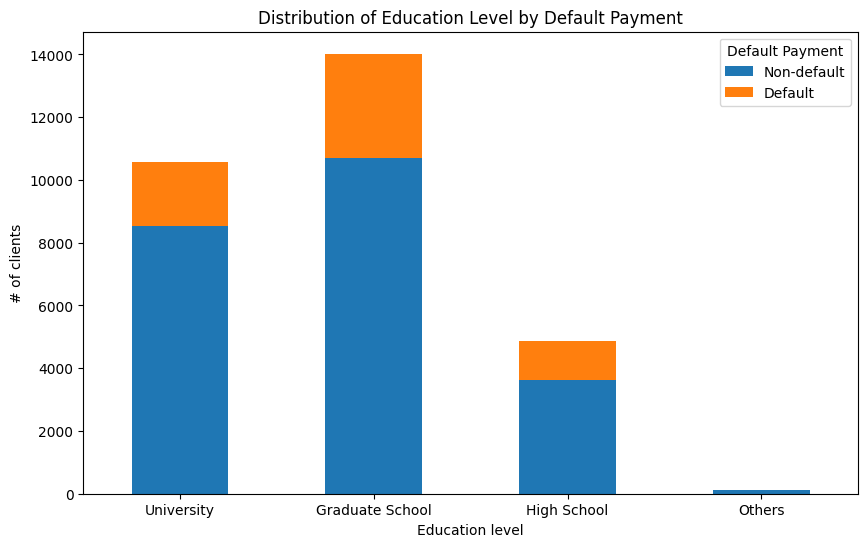

In [20]:
#Code Snippet 18:

# Group the data by 'EDUCATION' and 'Default' and count the occurrences
education_default_counts = data.groupby(['EDUCATION', 'Default']).size().unstack().fillna(0)

# Create a stacked barplot
ax = education_default_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize x-axis labels
ax.set_xticklabels(['University', 'Graduate School', 'High School', 'Others'], rotation=0)

# Set axis labels
ax.set_xlabel('Education level')
ax.set_ylabel('# of clients')

# Add legend with titles
ax.legend(['Non-default', 'Default'], title='Default Payment')

# Set plot title
plt.title('Distribution of Education Level by Default Payment')

# Display the plot
plt.show()

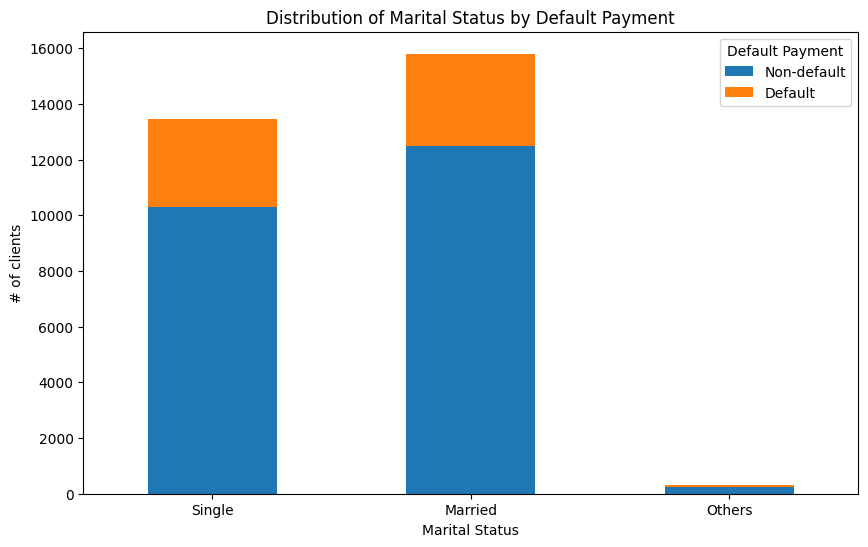

In [ ]:
#Code Snippet 19:

# Group the data by 'MARRIAGE' and 'Default' and count the occurrences
marriage_default_counts = data.groupby(['MARRIAGE', 'Default']).size().unstack().fillna(0)

# Create a stacked barplot
ax = marriage_default_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize x-axis labels
ax.set_xticklabels(['Single', 'Married', 'Others'], rotation=0)

# Set axis labels
ax.set_xlabel('Marital Status')
ax.set_ylabel('# of clients')

# Add legend with titles
ax.legend(['Non-default', 'Default'], title='Default Payment')

# Set plot title
plt.title('Distribution of Marital Status by Default Payment')

# Display the plot
plt.show()

In [ ]:
# Code Snippet 20:

# Display descriptive statistics for payment delay variables
payment_delay_description = data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()
print(payment_delay_description)

          PAY_1     PAY_2     PAY_3     PAY_4     PAY_5     PAY_6
count  29601.00  29601.00  29601.00  29601.00  29601.00  29601.00
mean      -0.01     -0.13     -0.16     -0.22     -0.26     -0.29
std        1.12      1.20      1.20      1.17      1.14      1.15
min       -2.00     -2.00     -2.00     -2.00     -2.00     -2.00
25%       -1.00     -1.00     -1.00     -1.00     -1.00     -1.00
50%        0.00      0.00      0.00      0.00      0.00      0.00
75%        0.00      0.00      0.00      0.00      0.00      0.00
max        8.00      8.00      8.00      8.00      8.00      8.00


In [ ]:
# Code Snippet 21:

# REPAYMENT STATUS = -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above
for att in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
  print(f"# {att} -------")
  print(data[att].value_counts())

# PAY_1 -------
 0    14499
-1     5633
 1     3662
-2     2708
 2     2640
 3      320
 4       76
 5       24
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64
# PAY_2 -------
 0    15476
-1     5990
 2     3904
-2     3722
 3      326
 4       97
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
# PAY_3 -------
 0    15518
-1     5863
-2     4027
 2     3802
 3      237
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
# PAY_4 -------
 0    16204
-1     5617
-2     4287
 2     3142
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64
# PAY_5 -------
 0    16684
-1     5480
-2     4479
 2     2617
 3      177
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64
# PAY_6 -------
 0    16053
-1     5674
-2     4806
 2     2756
 3      183
 4       49
 7       46
 6       19
 5       13
 8        2
Name: 

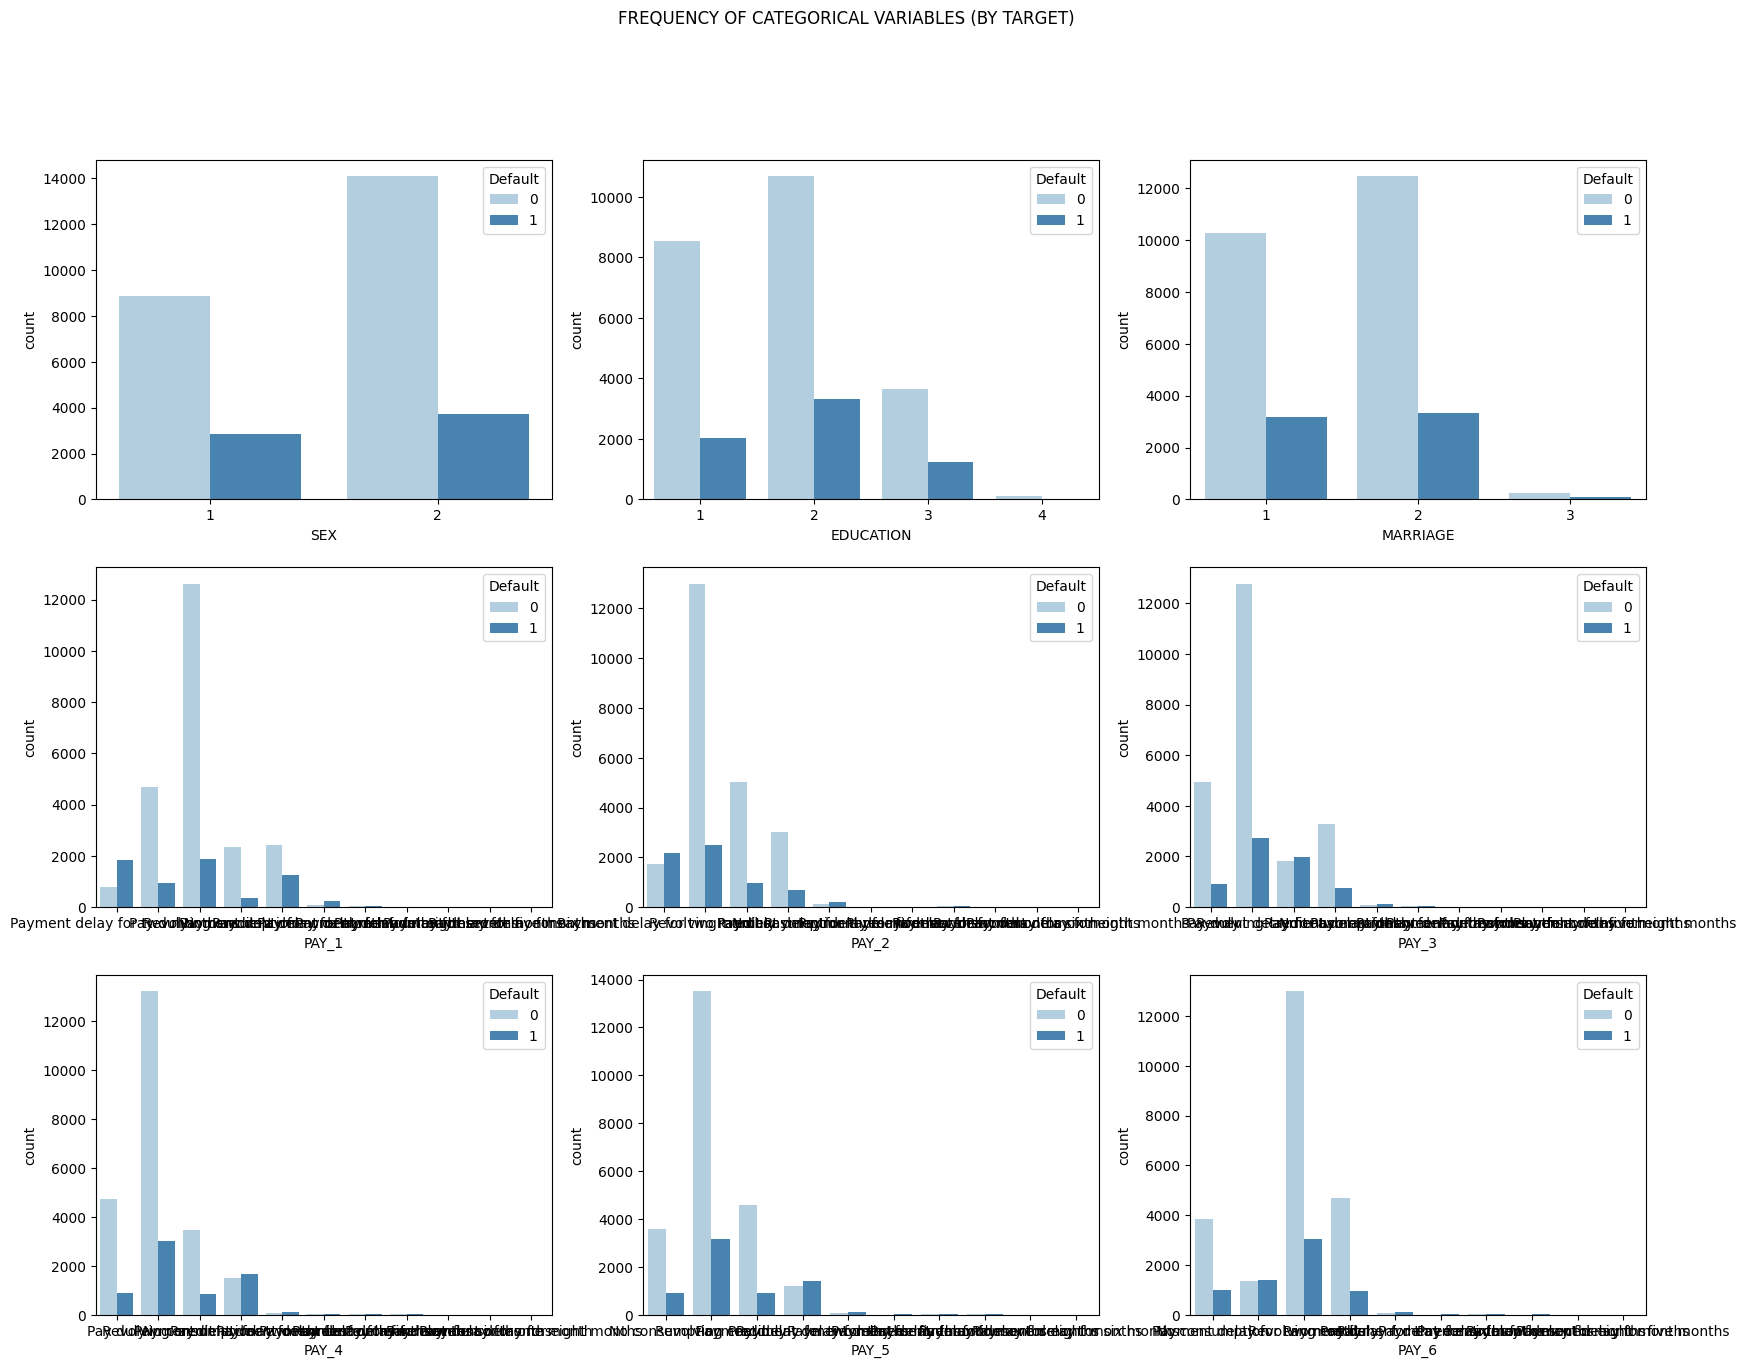

In [ ]:
# Code Snippet 22:
# Mapping the categorical values to their corresponding descriptions
payment_status_mapping = {
    -2: 'No consumption',
    -1: 'Pay duly',
    0: 'Revolving credit',
    1: 'Payment delay for one month',
    2: 'Payment delay for two months',
    3: 'Payment delay for three months',
    4: 'Payment delay for four months',
    5: 'Payment delay for five months',
    6: 'Payment delay for six months',
    7: 'Payment delay for seven months',
    8: 'Payment delay for eight months',
    9: 'Payment delay for nine months and above'
}

# Creating a new dataframe with categorical variables
subset = data[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Default']]

# Plotting the count of categorical variables by target variable
f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')

sns.countplot(x="SEX", hue="Default", data=subset, palette="Blues", ax=axes[0, 0])
sns.countplot(x="EDUCATION", hue="Default", data=subset, palette="Blues", ax=axes[0, 1])
sns.countplot(x="MARRIAGE", hue="Default", data=subset, palette="Blues", ax=axes[0, 2])
sns.countplot(x="PAY_1", hue="Default", data=subset.replace({"PAY_1": payment_status_mapping}), palette="Blues", ax=axes[1, 0])
sns.countplot(x="PAY_2", hue="Default", data=subset.replace({"PAY_2": payment_status_mapping}), palette="Blues", ax=axes[1, 1])
sns.countplot(x="PAY_3", hue="Default", data=subset.replace({"PAY_3": payment_status_mapping}), palette="Blues", ax=axes[1, 2])
sns.countplot(x="PAY_4", hue="Default", data=subset.replace({"PAY_4": payment_status_mapping}), palette="Blues", ax=axes[2, 0])
sns.countplot(x="PAY_5", hue="Default", data=subset.replace({"PAY_5": payment_status_mapping}), palette="Blues", ax=axes[2, 1])
sns.countplot(x="PAY_6", hue="Default", data=subset.replace({"PAY_6": payment_status_mapping}), palette="Blues", ax=axes[2, 2])

plt.show()

In [21]:
#Code snippet 23
# Separate features and target for both training/validation set and test set
y_train_val = data['Default']
X_train_val = data.drop('Default', axis=1)

# Split the dataset into training/validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=RANDOM_STATE, stratify=y_train_val)

# Set 'category' type to categorical attributes
for att in ['SEX', 'EDUCATION', 'MARRIAGE']:
    X_train_val[att] = X_train_val[att].astype('category')
    X_test[att] = X_test[att].astype('category')

# One-hot encoding for both training/validation set and test set
X_train_val = pd.concat([pd.get_dummies(X_train_val['SEX'], prefix='SEX'),
                        pd.get_dummies(X_train_val['EDUCATION'], prefix='EDUCATION'),
                        pd.get_dummies(X_train_val['MARRIAGE'], prefix='MARRIAGE'),
                        X_train_val], axis=1)

X_test = pd.concat([pd.get_dummies(X_test['SEX'], prefix='SEX'),
                   pd.get_dummies(X_test['EDUCATION'], prefix='EDUCATION'),
                   pd.get_dummies(X_test['MARRIAGE'], prefix='MARRIAGE'),
                   X_test], axis=1)

# Drop original columns
X_train_val.drop(['EDUCATION', 'SEX', 'MARRIAGE'], axis=1, inplace=True)
X_test.drop(['EDUCATION', 'SEX', 'MARRIAGE'], axis=1, inplace=True)

# Print samples (optional)
print(X_train_val.head())
print(X_test.head())


       SEX_1  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
28310      0      1            0            0            1            0   
11110      1      0            0            1            0            0   
11425      0      1            0            1            0            0   
15625      0      1            0            1            0            0   
14836      0      1            1            0            0            0   

       MARRIAGE_1  MARRIAGE_2  MARRIAGE_3     ID  ...  BILL_AMT3  BILL_AMT4  \
28310           0           1           0  28311  ...        0.0        0.0   
11110           1           0           0  11111  ...      780.0        0.0   
11425           1           0           0  11426  ...        0.0        0.0   
15625           1           0           0  15626  ...    43444.0    40616.0   
14836           1           0           0  14837  ...     1699.0        0.0   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_A

In [26]:
#Code snippet 23_1

# Chi-squared tests for categorical variables
from scipy.stats import chi2_contingency

# Specify categorical variables for chi-squared tests
categorical_variables = ['EDUCATION', 'MARRIAGE']

# Function to perform chi-squared tests
def perform_chi_squared_tests(data, categorical_variables, target_variable):
    for cat_var in categorical_variables:
        contingency_table = pd.crosstab(data[cat_var], data[target_variable])
        chi2, p, _, _ = chi2_contingency(contingency_table)

        print(f"Chi-squared test for {cat_var} and {target_variable}:")
        print(f"Chi2 value: {chi2}")
        print(f"P-value: {p}")
        print("")

# Perform chi-squared tests
perform_chi_squared_tests(data, categorical_variables, 'Default')

Chi-squared test for EDUCATION and Default:
Chi2 value: 118.72224730588866
P-value: 1.4541546992112855e-25

Chi-squared test for MARRIAGE and Default:
Chi2 value: 31.996084126826016
P-value: 1.1275572729869019e-07



In [ ]:
#Code snippet 24
# Calculate the correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Identify features with correlation coefficient >= 0.97
to_drop = [column for column in upper.columns if any(upper[column] >= 0.97)]

# Print the features to be dropped
print(to_drop)

# Optionally, drop the identified features from the dataset
data = data.drop(to_drop, axis=1)


[]


In [24]:
#code snippet 25
from sklearn.decomposition import PCA

# Prompt the user to choose whether to apply PCA
apply_pca = input("Do you want to apply PCA? (yes/no): ").lower() == 'yes'

if apply_pca:
    # Set the number of components for PCA
    n_pc = 12

    # Initialize PCA with the specified number of components
    pca = PCA(n_components=n_pc)

    # Fit PCA on the training data
    pca.fit(X_train_val)

    # Transform the training and test data using the trained PCA
    X_12d_train_val = pd.DataFrame(pca.transform(X_train_val))
    X_12d_test = pd.DataFrame(pca.transform(X_test))

    # Rename the columns of the transformed data
    X_12d_train_val.columns = ['PC' + str(i) for i in range(1, n_pc + 1)]
    X_12d_test.columns = ['PC' + str(i) for i in range(1, n_pc + 1)]

    # Display the transformed training data
    print("Transformed Training Data:")
    print(X_12d_train_val.head())

    # Check if PCA is set to be applied
    APPLY_PCA = True

    # If PCA is set to be applied, replace the original features with the PCA-transformed features
    if APPLY_PCA:
        X_train_val = X_12d_train_val
        X_test = X_12d_test
        print(f"PCA APPLIED: {APPLY_PCA}")
        print(X_12d_train_val.shape)
        print(X_12d_test.shape)
else:
    print("PCA not applied.")

# Continue with the next code snippets as needed


Do you want to apply PCA? (yes/no): yes
Transformed Training Data:
         PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0  -27702.96  167974.06  -1370.69  -1834.81   5379.04 -11551.51   8836.07   
1 -159393.73  -57504.11   2293.97    471.90  -1615.70    415.11  -1177.14   
2  -53957.47  123763.02  -5655.56  -5882.00  -8203.39   3822.38  -3553.54   
3  -73872.62  -94014.47 -50938.62  15298.31  10869.17 -10895.77 -21892.89   
4  -36600.60  148481.59  -7941.41  -5043.61  -7386.49   3257.03  -6509.67   

        PC8       PC9      PC10      PC11     PC12  
0  15145.59 -37674.98   5466.71   6059.56 -1763.82  
1    391.87   -187.47    541.03    394.74   934.78  
2   -227.49   1906.54   2159.85    -81.51   319.02  
3  -7657.22  -1627.78 -10744.91 -15652.62 -5075.60  
4   4171.66   2631.15   1806.06  -1626.74 -1713.26  
PCA APPLIED: True
(23680, 12)
(5921, 12)



Logistic Regression Metrics:
Precision: 0.23838836038052602
Recall: 0.967448902346707
F1 Score: 0.38252020353187666

Random Forest Metrics:
Precision: 0.5583596214511041
Recall: 0.1339894019682059
F1 Score: 0.21611721611721613

Naive Bayes Metrics:
Precision: 0.24457552138192543
Recall: 0.8788796366389099
F1 Score: 0.38266315095583386

Gradient Boosting Metrics:
Precision: 0.6666666666666666
Recall: 0.01514004542013626
F1 Score: 0.029607698001480387

Support Vector Machine Metrics:
Precision: 0.30628354910009475
Recall: 0.7342922028766087
F1 Score: 0.4322638146167559


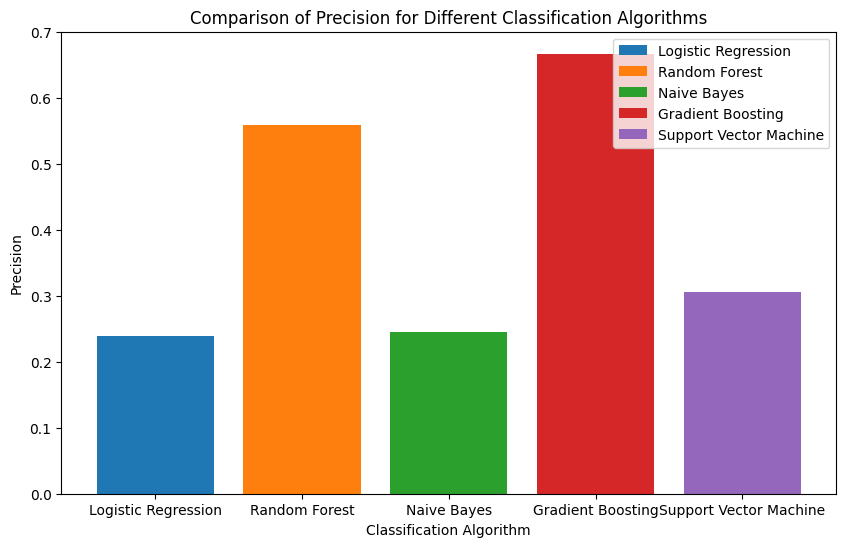

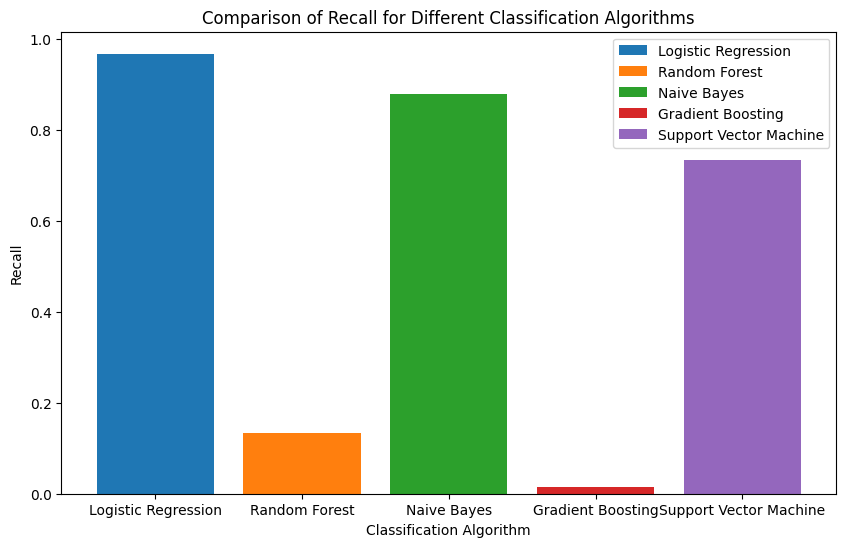

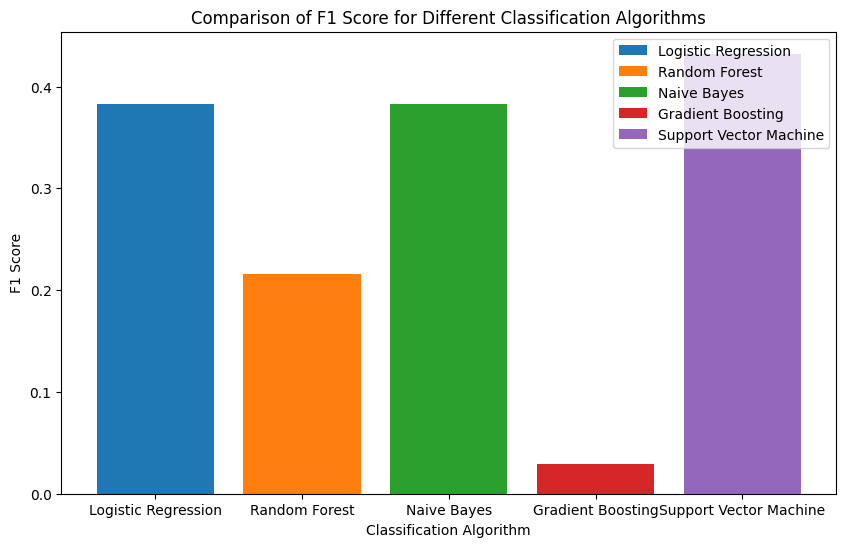

In [28]:
#code snippet 26

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Function to apply the chosen classification algorithm
def apply_classification_algorithm(algorithm, X_train_val, y_train_val, X_test, y_test):
    if algorithm == "Logistic Regression":
        # Example of setting class weights
        model = LogisticRegression(class_weight='balanced')

        # Standardize the features
        scaler = StandardScaler()
        X_train_val_scaled = scaler.fit_transform(X_train_val)
        X_test_scaled = scaler.transform(X_test)

        # Fit the model
        model.fit(X_train_val_scaled, y_train_val)

        # Example of setting a lower threshold (e.g., 0.3)
        y_pred = (model.predict_proba(X_test_scaled)[:, 1] > 0.3).astype(int)

    elif algorithm == "Random Forest":
        model = RandomForestClassifier()
        # Standardize the features
        scaler = StandardScaler()
        X_train_val_scaled = scaler.fit_transform(X_train_val)
        X_test_scaled = scaler.transform(X_test)
        # Fit the model
        model.fit(X_train_val_scaled, y_train_val)
        # For other algorithms, use the default threshold
        y_pred = model.predict(X_test_scaled)

    elif algorithm == "Naive Bayes":
        model = GaussianNB()
        # Fit the model
        model.fit(X_train_val, y_train_val)
        # For Naive Bayes, use the default threshold
        y_pred = model.predict(X_test)

    elif algorithm == "Gradient Boosting":
        model = GradientBoostingClassifier()
        # Standardize the features
        scaler = StandardScaler()
        X_train_val_scaled = scaler.fit_transform(X_train_val)
        X_test_scaled = scaler.transform(X_test)
        # Fit the model
        model.fit(X_train_val_scaled, y_train_val)
        # For other algorithms, use the default threshold
        y_pred = model.predict(X_test_scaled)

    elif algorithm == "Support Vector Machine":
        model = SVC()
        # Standardize the features
        scaler = StandardScaler()
        X_train_val_scaled = scaler.fit_transform(X_train_val)
        X_test_scaled = scaler.transform(X_test)

        # Apply SMOTE
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_val_scaled, y_train_val)

        # Fit the model on resampled data
        model.fit(X_train_resampled, y_train_resampled)

        # For other algorithms, use the default threshold
        y_pred = model.predict(X_test_scaled)

    # Evaluate the model and return the metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return precision, recall, f1

# Assuming you have X_train_val, y_train_val, X_test, y_test
# List of classification algorithms
algorithms = ["Logistic Regression", "Random Forest", "Naive Bayes", "Gradient Boosting", "Support Vector Machine"]

# Dictionary to store results
results = {'Precision': {}, 'Recall': {}, 'F1 Score': {}}

# Run all classification algorithms
for algorithm in algorithms:
    precision, recall, f1 = apply_classification_algorithm(algorithm, X_train_val, y_train_val, X_test, y_test)
    results['Precision'][algorithm] = precision
    results['Recall'][algorithm] = recall
    results['F1 Score'][algorithm] = f1

    # Print results for each algorithm
    print(f"\n{algorithm} Metrics:")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

# Create separate charts for Precision, Recall, and F1 Score with different colors and legend
metrics = ['Precision', 'Recall', 'F1 Score']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    for i, algorithm in enumerate(algorithms):
        values = [results[metric][algorithm]]
        plt.bar(algorithm, values, color=f'C{i}', label=algorithm)

    plt.legend()
    plt.xlabel('Classification Algorithm')
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric} for Different Classification Algorithms')
    plt.show()
